# T2Echo experiment

This notebook shows you how to set and run the T2Echo experiment.

The T2Echo experiment is used to determine the T2 dephasing value of a qubit.

The value of T2 is measured through the following sequence of operations:

    1. Prepare the qubit in the ∣−i⟩ state by sending a π/2-pulse to the qubit.

    2. Wait some time t.

    4. Send a π-pulse to the qubit.

    5. Wait some time t.

    6. Send a π/2-pulse to the qubit.
    
    7. Measure the qubit.

The measured data is fitted to an exponential decaying function. The waiting time is what the experiment will loop over, both wait gates will wait the same amount of time.

In [ ]:
import os

import numpy as np

import qililab as ql

os.environ["RUNCARDS"] = "./runcards"
os.environ["DATA"] = "./data"

## Select and connect to platform

In [1]:
platform = ql.build_platform(name="soprano_master_galadriel")
platform.connect()
platform.turn_on_instruments()
platform.initial_setup()

## Setup experiment

In [8]:
wait_start = 0.0
wait_stop = 58001.0
wait_step = 2400.0
wait = np.arange(wait_start, wait_stop, wait_step)
experiment = ql.experiment.T2Echo(qubit=2, platform=platform, wait_values=wait, hardware_average=10_000)
experiment.build_execution()

## Run experiment

In [9]:

results = experiment.run()

  0%|          | 0/25 [00:00<?, ?it/s]

## Get the results

First we post process the results, apply the dB to the S21.
After that we are able to fit and plot the values

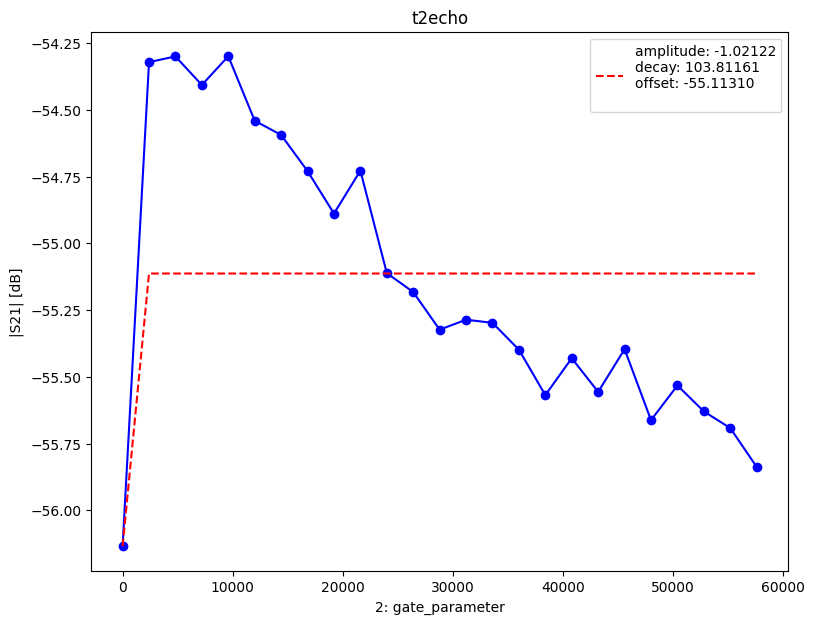

In [10]:
# post process the data ([dB]|S21|)
_ = experiment.post_process_results()
# fit the data
T2echo = experiment.fit()
# plot data with fitted parameters
fig = experiment.plot()